In [79]:
!pip install tensorflow

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM

In [81]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
!pip install ydata_profiling

In [83]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
log=np.array(logreg_predictions)
error=np.array(abs(log-np.array(y_test)))

In [87]:
round(1-(X_test.shape[1]/error.sum()),1)

0.8

In [88]:
X_train1=np.array(X_train)
X_train1

array([[  2.   ,  84.   ,   0.   , ...,   0.   ,   0.304,  21.   ],
       [  9.   , 112.   ,  82.   , ...,  28.2  ,   1.282,  50.   ],
       [  1.   , 139.   ,  46.   , ...,  28.7  ,   0.654,  22.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [89]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Epoch 1/50
20/20 - 1s - loss: 1.0336 - accuracy: 0.4788 - 679ms/epoch - 34ms/step
Epoch 2/50
20/20 - 0s - loss: 0.9656 - accuracy: 0.5033 - 39ms/epoch - 2ms/step
Epoch 3/50
20/20 - 0s - loss: 0.9062 - accuracy: 0.5261 - 54ms/epoch - 3ms/step
Epoch 4/50
20/20 - 0s - loss: 0.8538 - accuracy: 0.5391 - 66ms/epoch - 3ms/step
Epoch 5/50
20/20 - 0s - loss: 0.8071 - accuracy: 0.5668 - 80ms/epoch - 4ms/step
Epoch 6/50
20/20 - 0s - loss: 0.7685 - accuracy: 0.5961 - 65ms/epoch - 3ms/step
Epoch 7/50
20/20 - 0s - loss: 0.7326 - accuracy: 0.6336 - 112ms/epoch - 6ms/step
Epoch 8/50
20/20 - 0s - loss: 0.7008 - accuracy: 0.6612 - 115ms/epoch - 6ms/step
Epoch 9/50
20/20 - 0s - loss: 0.6724 - accuracy: 0.6840 - 159ms/epoch - 8ms/step
Epoch 10/50
20/20 - 0s - loss: 0.6474 - accuracy: 0.7036 - 165ms/epoch - 8ms/step
Epoch 11/50
20/20 - 0s - loss: 0.6248 - accuracy: 0.7199 - 88ms/epoch - 4ms/step
Epoch 12/50
20/20 - 0s - loss: 0.6051 - accuracy: 0.7296 - 89ms/epoch - 4ms/step
Epoch 13/50
20/20 - 0s - loss: 

Accuracy: 0.72


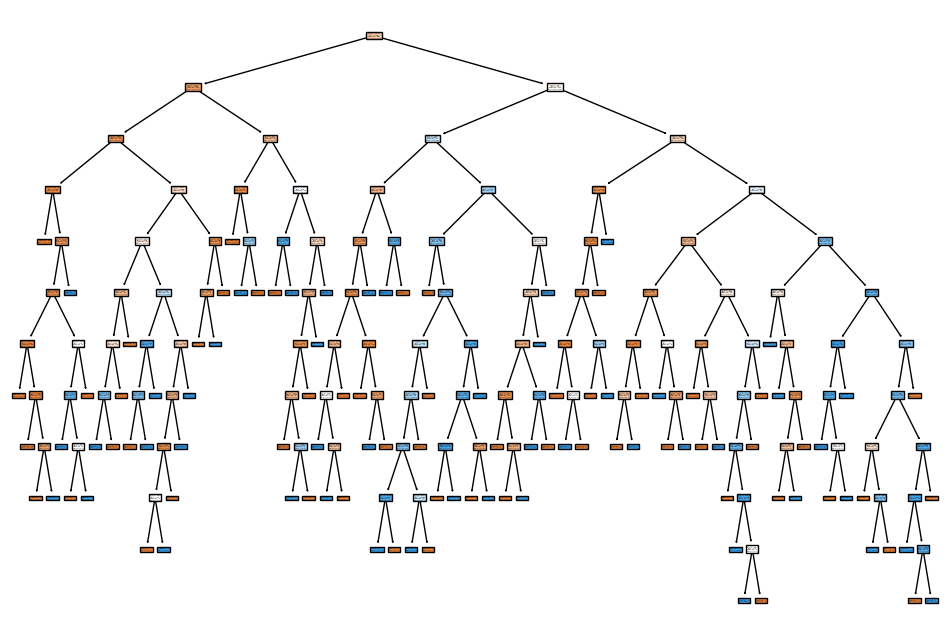

In [90]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
tree.plot_tree(rf_classifier.estimators_[0], filled=True)
plt.show()


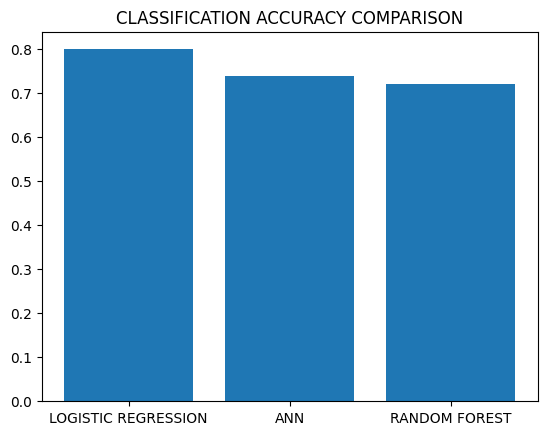

In [91]:
plt.bar(["LOGISTIC REGRESSION","ANN","RANDOM FOREST"],[0.8,0.74,0.72])
plt.title("CLASSIFICATION ACCURACY COMPARISON")
plt.show();